# CO2 Emissions Prediction

In [1]:
# importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# loading the dataset
df = pd.read_csv('MY2010-2014 Fuel Consumption Ratings 5-cycle.csv', encoding ="unicode_escape") 
df.head()

C:\Users\707830\AppData\Local\Temp\ipykernel_16976\1847964869.py:2: DtypeWarning: Columns (4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MY2010-2014 Fuel Consumption Ratings 5-cycle.csv', encoding ="unicode_escape")


,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5385, 221)

In [5]:
df.columns

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION*', 'Unnamed: 9',
       ...
       'Unnamed: 211', 'Unnamed: 212', 'Unnamed: 213', 'Unnamed: 214',
       'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217', 'Unnamed: 218',
       'Unnamed: 219', 'Unnamed: 220'],
      dtype='object', length=221)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Columns: 221 entries, MODEL to Unnamed: 220
dtypes: float64(209), object(12)
memory usage: 9.1+ MB


In [7]:
#Defining a dictiobary for replacements
rename_column = {
    'MODEL': 'Model_Year',
    'MAKE': 'Make',
    'MODEL.1': 'Model',
    'VEHICLE CLASS': 'Vehicle_Class',
    'ENGINE SIZE': 'Engine_Size(L)',
    'CYLINDERS': 'Cylinders',
    'TRANSMISSION': 'Transmission',
    'FUEL': 'Fuel_Type',
    'FUEL CONSUMPTION*': 'Fuel_Consump_City(L/100 km)',
    'Unnamed: 9': 'Fuel_Consump_HWY(L/100 km)',
    'Unnamed: 10': 'Fuel_Consump_Comb(L/100 km)',
    'Unnamed: 11': 'Fuel_Consump_Comb(mpg)',
    'CO2 EMISSIONS ': 'CO2_Emmissions(g/km)'
    }
# Renaming Dataframes in df
df = df.rename(columns=rename_column)
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consump_City(L/100 km),Fuel_Consump_HWY(L/100 km),...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Drop the first row (index 0) after the header
df.drop([0], inplace = True) 

# Droping empty columns
columns_to_keep = df.columns[:13]  
df = df[columns_to_keep]
df.reset_index(inplace = True) 
df.drop(df[['index']], axis = 1, inplace = True) 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model_Year                   5368 non-null   object 
 1   Make                         5378 non-null   object 
 2   Model                        5359 non-null   object 
 3   Vehicle_Class                5359 non-null   object 
 4   Engine_Size(L)               5359 non-null   object 
 5   Cylinders                    5359 non-null   float64
 6   Transmission                 5359 non-null   object 
 7   Fuel_Type                    5359 non-null   object 
 8   Fuel_Consump_City(L/100 km)  5359 non-null   object 
 9   Fuel_Consump_HWY(L/100 km)   5359 non-null   object 
 10  Fuel_Consump_Comb(L/100 km)  5359 non-null   object 
 11  Fuel_Consump_Comb(mpg)       5359 non-null   object 
 12  CO2_Emmissions(g/km)         5359 non-null   object 
dtypes: float64(1), obj

,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consump_City(L/100 km),Fuel_Consump_HWY(L/100 km),Fuel_Consump_Comb(L/100 km),Fuel_Consump_Comb(mpg),CO2_Emmissions(g/km)
0,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24,274


In [9]:
df.isna().sum()

Model_Year                     16
Make                            6
Model                          25
Vehicle_Class                  25
Engine_Size(L)                 25
Cylinders                      25
Transmission                   25
Fuel_Type                      25
Fuel_Consump_City(L/100 km)    25
Fuel_Consump_HWY(L/100 km)     25
Fuel_Consump_Comb(L/100 km)    25
Fuel_Consump_Comb(mpg)         25
CO2_Emmissions(g/km)           25
dtype: int64

In [10]:
df = df.dropna() # Dropping rows with NaN Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model_Year                   5359 non-null   object 
 1   Make                         5359 non-null   object 
 2   Model                        5359 non-null   object 
 3   Vehicle_Class                5359 non-null   object 
 4   Engine_Size(L)               5359 non-null   object 
 5   Cylinders                    5359 non-null   float64
 6   Transmission                 5359 non-null   object 
 7   Fuel_Type                    5359 non-null   object 
 8   Fuel_Consump_City(L/100 km)  5359 non-null   object 
 9   Fuel_Consump_HWY(L/100 km)   5359 non-null   object 
 10  Fuel_Consump_Comb(L/100 km)  5359 non-null   object 
 11  Fuel_Consump_Comb(mpg)       5359 non-null   object 
 12  CO2_Emmissions(g/km)         5359 non-null   object 
dtypes: float64(1), object(1

In [12]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size(L)',
       'Cylinders', 'Transmission', 'Fuel_Type', 'Fuel_Consump_City(L/100 km)',
       'Fuel_Consump_HWY(L/100 km)', 'Fuel_Consump_Comb(L/100 km)',
       'Fuel_Consump_Comb(mpg)', 'CO2_Emmissions(g/km)'],
      dtype='object')

In [13]:
#Normalizing Dataframe
df['Model_Year'] = df['Model_Year'].astype(int)
df['Engine_Size(L)'] = df['Engine_Size(L)'].astype(float)
df['Cylinders'] = df['Cylinders'].astype(int)
df['Fuel_Consump_City(L/100 km)'] = df['Fuel_Consump_City(L/100 km)'].astype(float)
df['Fuel_Consump_HWY(L/100 km)'] = df['Fuel_Consump_HWY(L/100 km)'].astype(float)
df['Fuel_Consump_Comb(L/100 km)'] = df['Fuel_Consump_Comb(L/100 km)'].astype(float)
df['Fuel_Consump_Comb(mpg)'] = df['Fuel_Consump_Comb(mpg)'].astype(int)
df['CO2_Emmissions(g/km)'] = df['CO2_Emmissions(g/km)'].astype(int)

In [14]:
#Cheching Duplicates
df.duplicated().sum() 

0

In [15]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Model_Year,5359.0,2012.01,1.40,2010.0,2011.0,2012.0,2013.0,2014.0
Engine_Size(L),5359.0,3.49,1.39,1.0,2.4,3.5,4.6,8.4
Cylinders,5359.0,5.96,1.87,2.0,4.0,6.0,8.0,16.0
Fuel_Consump_City(L/100 km),5359.0,13.90,4.16,4.5,11.0,13.2,16.0,30.4
Fuel_Consump_HWY(L/100 km),5359.0,9.93,2.81,4.9,8.0,9.3,11.2,20.8
Fuel_Consump_Comb(L/100 km),5359.0,12.12,3.52,4.7,9.7,11.4,13.9,26.0
Fuel_Consump_Comb(mpg),5359.0,25.17,6.96,11.0,20.0,25.0,29.0,60.0
CO2_Emmissions(g/km),5359.0,267.66,64.32,108.0,221.0,260.0,305.0,566.0


### Exploratory Data Analysis (EDA)

#### Checking for the distribution:

<Figure size 1280x960 with 0 Axes>

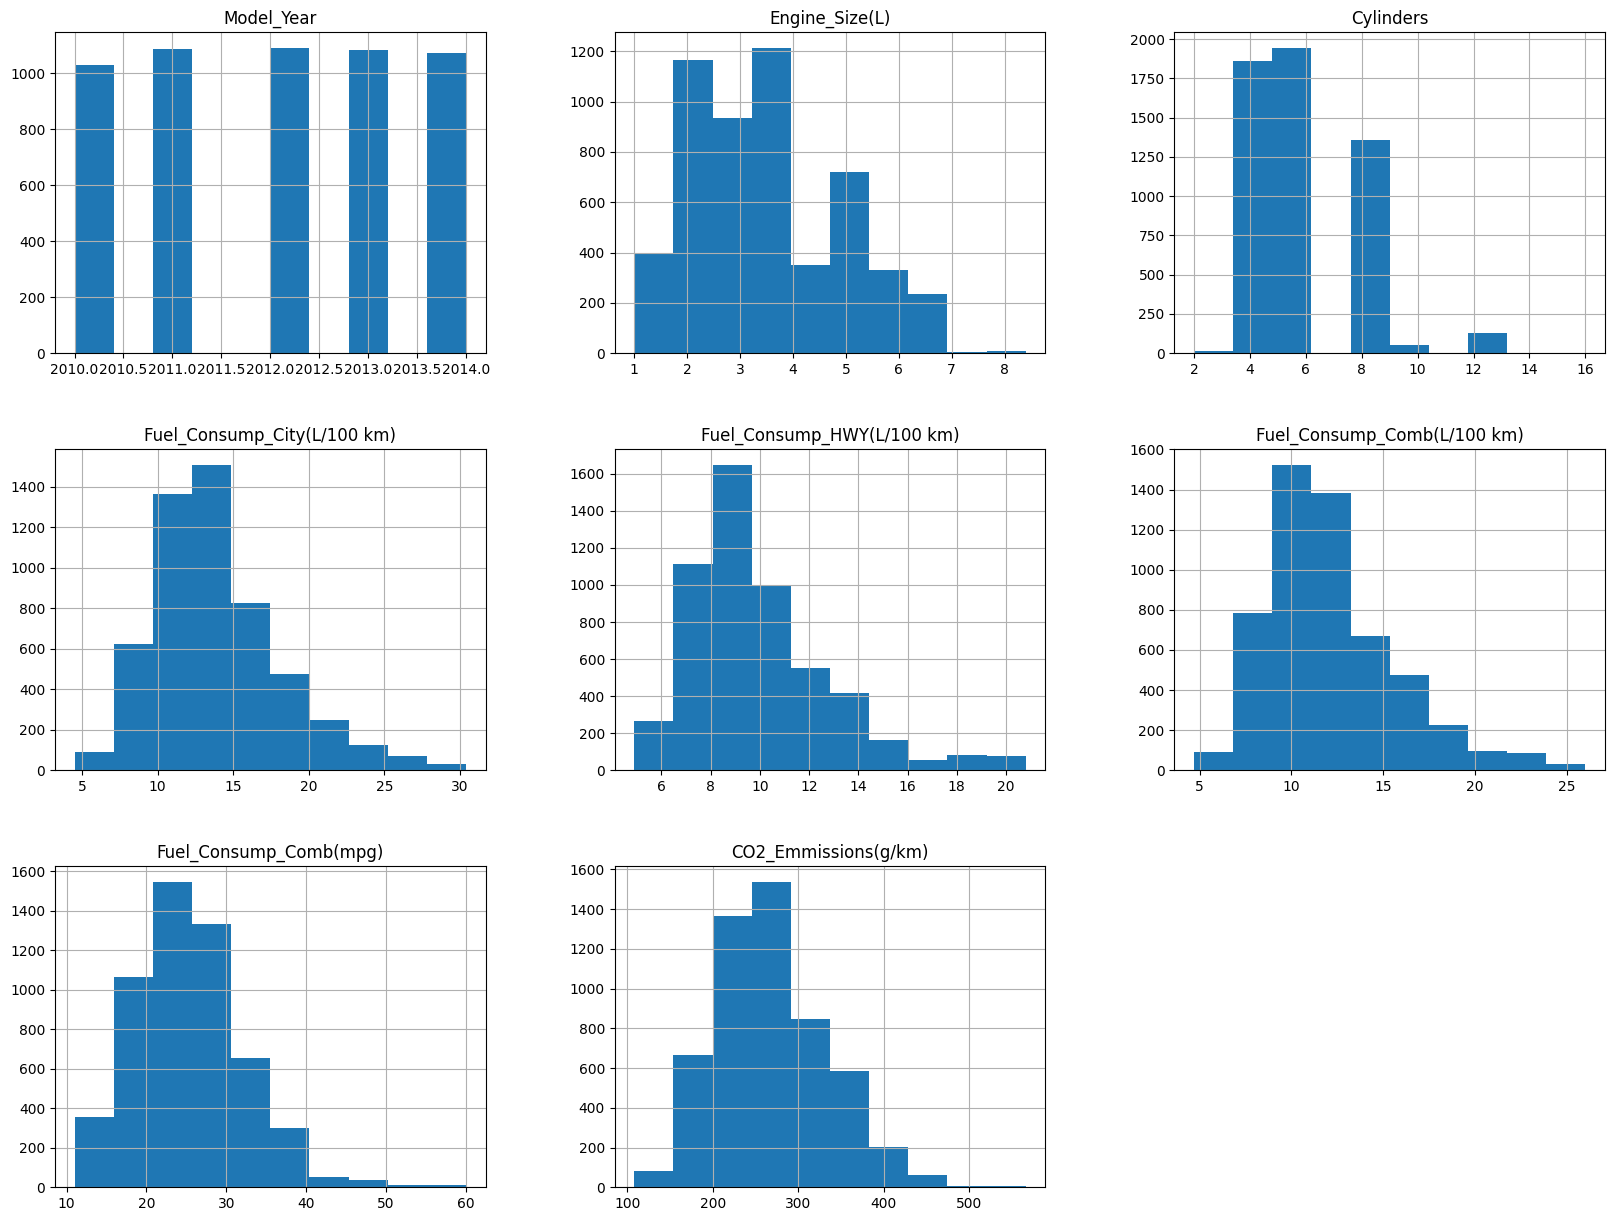

In [16]:
plt.figure(dpi=200) 
df.hist(figsize = (20,15)) 
plt.show() 

In [17]:
#Specifying bins edges and labels
bin_edges = [100, 200, 300, 400, 500, 600]
bin_labels = ['100-199', '200-299', '300-399', '400-499', '500-599']

# Creating bins and labels
df['Emission_Range'] = pd.cut(df['CO2_Emmissions(g/km)'], bins=bin_edges, labels=bin_labels)
df

,Model_Year,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consump_City(L/100 km),Fuel_Consump_HWY(L/100 km),Fuel_Consump_Comb(L/100 km),Fuel_Consump_Comb(mpg),CO2_Emmissions(g/km),Emission_Range
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219,200-299
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205,200-299
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230,200-299
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304,300-399
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274,200-299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271,200-299
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264,200-299
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271,200-299
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260,200-299


In [18]:
# Calculating percentage by age group and risk level
df['percent'] = df.groupby(['Emission_Range', 'Fuel_Type'])['Fuel_Type'].transform('count') / df.groupby('Emission_Range')['Fuel_Type'].transform('count') * 100


C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\707830\AppData\Local\Temp\ipykernel_16976\2123486088.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


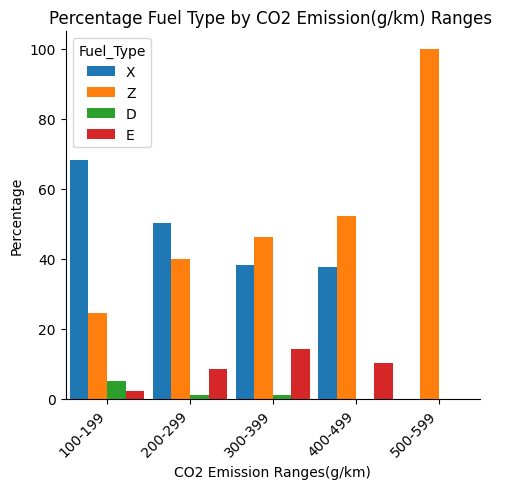

In [19]:
sns.catplot(x='Emission_Range', y='percent', hue='Fuel_Type', kind='bar', data=df, saturation=1, width=0.9, legend_out=False)

# Add labels and title
plt.xlabel('CO2 Emission Ranges(g/km)')
plt.ylabel('Percentage')
plt.title('Percentage Fuel Type by CO2 Emission(g/km) Ranges ')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.savefig('fuel_type_by_co2_emission.png')
plt.show()

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x3000 with 0 Axes>

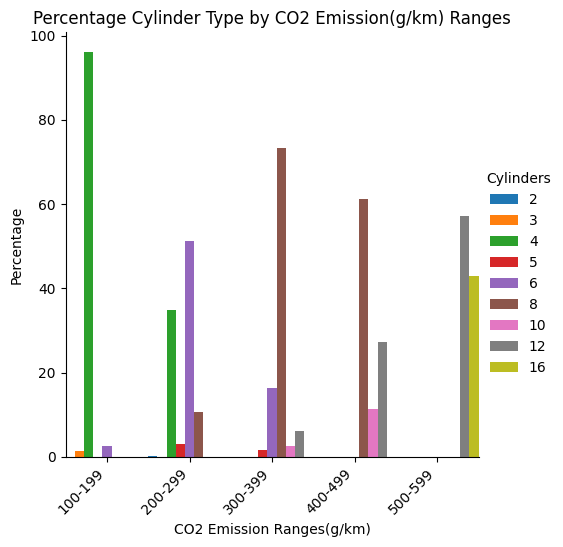

In [20]:
# Calculating percentage Cylinders by Emission Range
df['percent'] = df.groupby(['Emission_Range', 'Cylinders'])['Cylinders'].transform('count') / df.groupby('Emission_Range')['Cylinders'].transform('count') * 100

# Set the figure size and widen the bars
plt.figure(figsize=(30, 30))  # Adjust width and height values as per your requirement
sns.catplot(x='Emission_Range', y='percent', hue='Cylinders', kind='bar', data=df, saturation=1, width=1, legend_out=True)  # Adjust width value as needed

# Add labels and title
plt.xlabel('CO2 Emission Ranges(g/km)')
plt.ylabel('Percentage')
plt.title('Percentage Cylinder Type by CO2 Emission(g/km) Ranges')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.savefig('Cylinder_by_co2_emission.png')
plt.show()

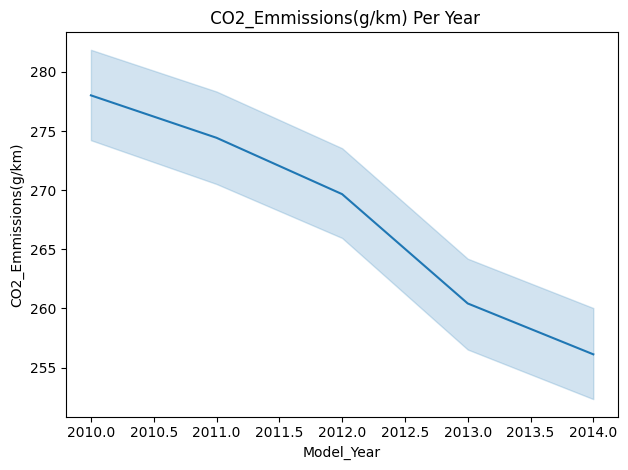

In [45]:
sns.lineplot(data = df, x = 'Model_Year',  y = 'CO2_Emmissions(g/km)');
plt.title(' CO2_Emmissions(g/km) Per Year')
plt.ylabel('CO2_Emmissions(g/km)')
# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('CO2_Emmissions_Per_Year.png')
plt.show()

In [21]:
# Checking Numerical Variables
numeric_df = df.select_dtypes(include = 'number') # obtains all the datatypes that are numbers  
numeric_df 

,Model_Year,Engine_Size(L),Cylinders,Fuel_Consump_City(L/100 km),Fuel_Consump_HWY(L/100 km),Fuel_Consump_Comb(L/100 km),Fuel_Consump_Comb(mpg),CO2_Emmissions(g/km),percent
0,2010,2.0,4,10.9,7.8,9.5,30,219,34.976000
1,2010,2.0,4,10.0,7.6,8.9,32,205,34.976000
2,2010,2.0,4,11.6,8.1,10.0,28,230,34.976000
3,2010,3.7,6,14.8,11.3,13.2,21,304,16.246057
4,2010,2.3,4,13.2,10.3,11.9,24,274,34.976000
...,...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271,51.168000
5355,2014,3.2,6,13.2,9.5,11.5,25,264,51.168000
5356,2014,3.0,6,13.4,9.8,11.8,24,271,51.168000
5357,2014,3.2,6,12.9,9.3,11.3,25,260,51.168000


In [22]:
#Checking Categorical Variables
categorical_df = df.select_dtypes(include = 'object')   
categorical_df 

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
0,ACURA,CSX,COMPACT,AS5,X
1,ACURA,CSX,COMPACT,M5,X
2,ACURA,CSX,COMPACT,M6,Z
3,ACURA,MDX AWD,SUV,AS6,Z
4,ACURA,RDX AWD TURBO,SUV,AS5,Z
...,...,...,...,...,...
5354,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5355,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5356,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
5357,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


### Encoding Fuel types using Label Encoding

In [23]:
df['Fuel_Type'].unique() # checking the number of unique variable of columns requiring one hot encoding

array(['X', 'Z', 'D', 'E'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder() 
le_data = le.fit_transform(categorical_df['Fuel_Type'])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['Fuel_Type']) # creates a dataframe 
le_df = pd.concat([numeric_df,df_le], axis = 1) 
le_df

,Model_Year,Engine_Size(L),Cylinders,Fuel_Consump_City(L/100 km),Fuel_Consump_HWY(L/100 km),Fuel_Consump_Comb(L/100 km),Fuel_Consump_Comb(mpg),CO2_Emmissions(g/km),percent,Fuel_Type
0,2010,2.0,4,10.9,7.8,9.5,30,219,34.976000,2
1,2010,2.0,4,10.0,7.6,8.9,32,205,34.976000,2
2,2010,2.0,4,11.6,8.1,10.0,28,230,34.976000,3
3,2010,3.7,6,14.8,11.3,13.2,21,304,16.246057,3
4,2010,2.3,4,13.2,10.3,11.9,24,274,34.976000,3
...,...,...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271,51.168000,2
5355,2014,3.2,6,13.2,9.5,11.5,25,264,51.168000,2
5356,2014,3.0,6,13.4,9.8,11.8,24,271,51.168000,2
5357,2014,3.2,6,12.9,9.3,11.3,25,260,51.168000,2


In [26]:
le_df.isna().sum()

Model_Year                     0
Engine_Size(L)                 0
Cylinders                      0
Fuel_Consump_City(L/100 km)    0
Fuel_Consump_HWY(L/100 km)     0
Fuel_Consump_Comb(L/100 km)    0
Fuel_Consump_Comb(mpg)         0
CO2_Emmissions(g/km)           0
percent                        0
Fuel_Type                      0
dtype: int64

In [27]:
le_df.drop(df[['Model_Year']], axis = 1, inplace = True)

In [28]:
# Establishing the correlation level between variables
corr = le_df.corr()
corr

,Engine_Size(L),Cylinders,Fuel_Consump_City(L/100 km),Fuel_Consump_HWY(L/100 km),Fuel_Consump_Comb(L/100 km),Fuel_Consump_Comb(mpg),CO2_Emmissions(g/km),percent,Fuel_Type
Engine_Size(L),1.000000,0.917291,0.815753,0.771050,0.806126,-0.803472,0.857052,-0.168719,0.039293
Cylinders,0.917291,1.000000,0.784184,0.716811,0.766065,-0.754037,0.840469,-0.171600,0.129811
Fuel_Consump_City(L/100 km),0.815753,0.784184,1.000000,0.965417,0.995566,-0.932240,0.891427,-0.156061,-0.155086
Fuel_Consump_HWY(L/100 km),0.771050,0.716811,0.965417,1.000000,0.985518,-0.895407,0.855552,-0.125913,-0.222458
Fuel_Consump_Comb(L/100 km),0.806126,0.766065,0.995566,0.985518,1.000000,-0.926282,0.885359,-0.146071,-0.181224
Fuel_Consump_Comb(mpg),-0.803472,-0.754037,-0.932240,-0.895407,-0.926282,1.000000,-0.897255,0.300763,0.052949
CO2_Emmissions(g/km),0.857052,0.840469,0.891427,0.855552,0.885359,-0.897255,1.000000,-0.200990,0.076661
percent,-0.168719,-0.171600,-0.156061,-0.125913,-0.146071,0.300763,-0.200990,1.000000,-0.091950
Fuel_Type,0.039293,0.129811,-0.155086,-0.222458,-0.181224,0.052949,0.076661,-0.091950,1.000000


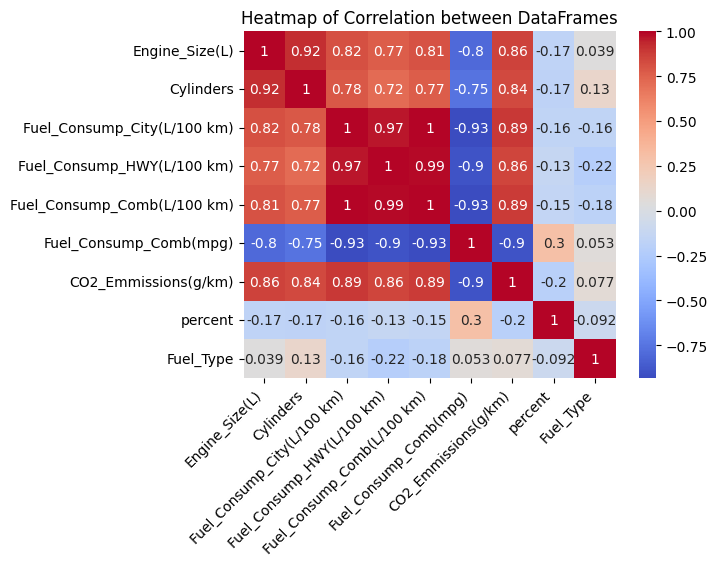

In [29]:
# Creating the heatmap using the Seaborn library
plt.figure(figsize=(6, 4.5))
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Slant the x-axis tick labels
plt.xticks(rotation=45, ha='right')

# Displaying the heatmap
plt.title("Heatmap of Correlation between DataFrames")
plt.savefig('Correlation_Matrix.png')
plt.show()


it can be seen that there is a good correlation between the variable except for fueltype which was initially a categorical variable <br>
the variables with the highest correlation with the targets are <br>
- fuel consumption COMB2 with-0.9 negative correlation
- fuel consumption city with 0.89 positive correlation

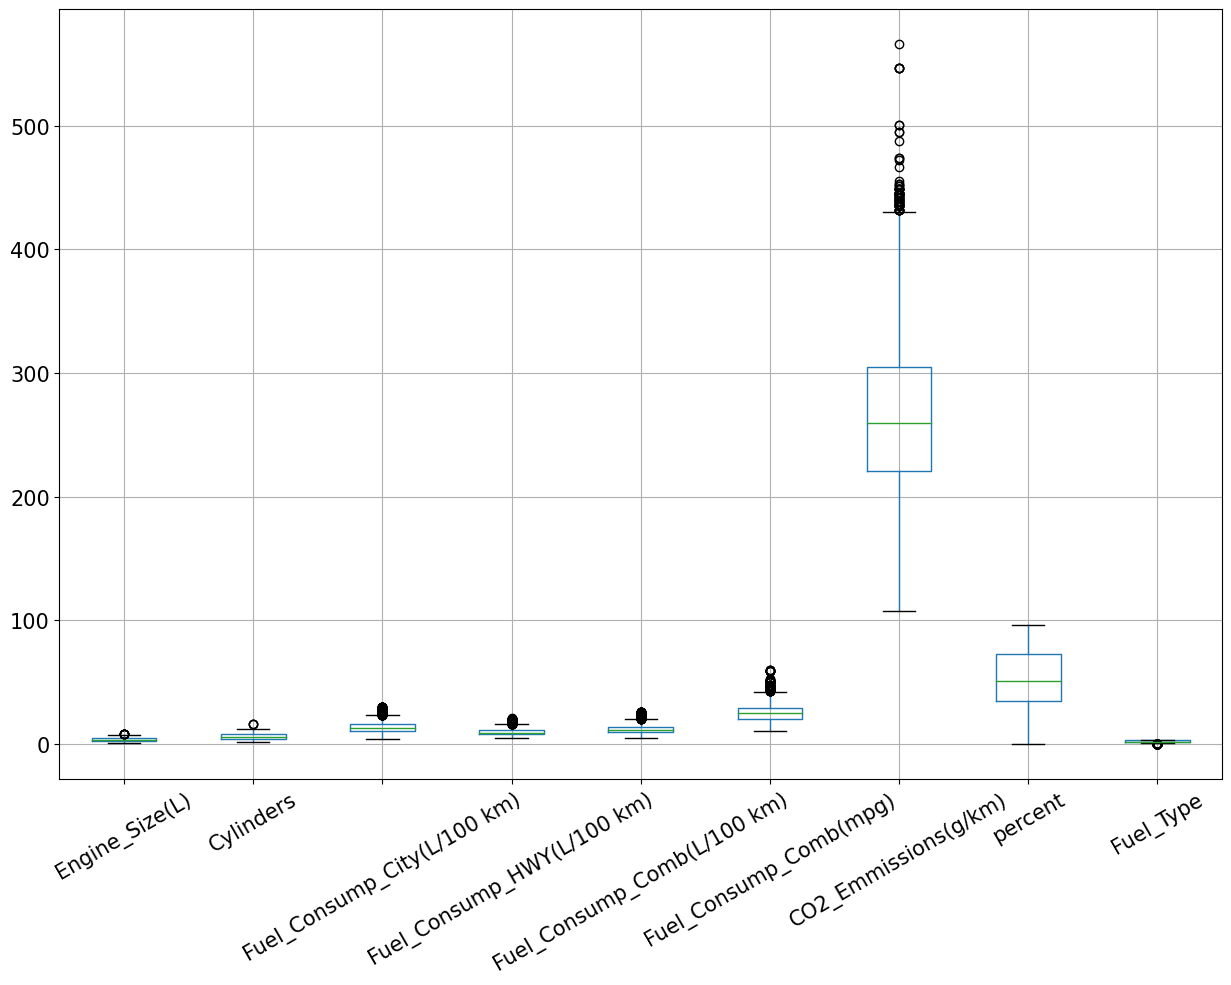

In [30]:
le_df.boxplot(figsize = (15,10), fontsize = 15, rot = 30) 
# to detect outliers
plt.show() 

The boxplot shows that some of the variables exert dominance over the others as 
it can be seen that the values of CO2 emission 
are bigger than the other columns, hence there will be a  need for scaling or normalizing.

## Building the machine learning model

#### Linear regression is used for building machine learning with numeric data/ variables. 2 types of regression models will be evaluated for their performance; they include
1. Simple linear regression model
2. Multi-linear regression model

Creating the train, validation and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. Futhermore, we split the 80% of train data to validation data(20%) for validation.

In [32]:
X = le_df.drop('CO2_Emmissions(g/km)', axis = 1) #(Features)
y = le_df['CO2_Emmissions(g/km)']  #(Target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [33]:
X_train.shape

(3429, 8)

In [34]:
y_train.shape

(3429,)

In [35]:
X_val.shape

(858, 8)

In [36]:
#X_train=X_train.dropna()
#y_train=y_train.dropna()
#X_test=X_test.dropna()
#y_test= y_test.dropna()
#X_val=X_val.dropna()
#y_val= y_val.dropna()

In [37]:
#Scaling dataset
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

In [38]:
#converting to pandas dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns) 
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns) 

In [39]:
X_train_scaled['Engine_Size(L)'].shape # sklearn accepts data in rows and columns 

(3429,)

In [40]:
# Reshaping the attribute 
X_train_scaled_Engine_Size=X_train_scaled['Engine_Size(L)'].to_numpy().reshape(-1,1)  
X_val_scaled_Engine_Size = X_val_scaled['Engine_Size(L)'].to_numpy().reshape(-1,1) 
X_test_scaled_Engine_Size = X_test_scaled['Engine_Size(L)'].to_numpy().reshape(-1,1) 

In [41]:
from sklearn.linear_model import LinearRegression # importing the model 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [42]:
model = LinearRegression() #instantiating the model

In [43]:
# The model test report 
def model_test_report(model): 
    model.fit(X_train_scaled_Engine_Size,y_train) 
    basem_preds = model.predict(X_test_scaled_Engine_Size)     
    mean_abs = mean_absolute_error(y_test,basem_preds) 
    mean_squared = mean_squared_error(y_test,basem_preds) 
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}") 
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}") 
model_test_report(model)

The result of the mean_absolute_error is: 24.48
The result of the root mean squared error is : 33.08
The result of the coefficient of determination is: 0.73


### Multiplelinear regression

In [44]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled[['Fuel_Consump_Comb(mpg)','Cylinders']],y_train) 
    basem_preds = model.predict(X_test_scaled[['Fuel_Consump_Comb(mpg)','Cylinders']])     
    mean_abs = mean_absolute_error(y_test,basem_preds) 
    mean_squared = mean_squared_error(y_test,basem_preds) 
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}") 
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}") 
 
report_model_test(model)

The result of the mean_absolute_error is: 15.45
The result of the root mean squared error is : 23.44
The result of the coefficient of determination is: 0.87


### Label Encoding

In [46]:
Encoded_df=df

In [47]:
Encoded_df['Make'] = le.fit_transform(df['Make'])
Encoded_df['Vehicle_Class'] = le.fit_transform(df['Vehicle_Class'])
Encoded_df['Model'] = le.fit_transform(df['Model'])
Encoded_df['Transmission'] = le.fit_transform(df['Transmission'])

## Cylinders

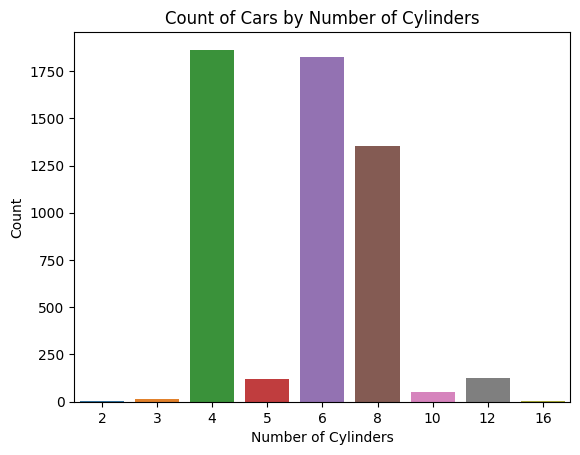

In [48]:
# Create the count plot
sns.countplot(data=df, x='Cylinders')
# Add labels and title
plt.title('Count of Cars by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

In [49]:
# Specifying Input Variable(Feature) and the Target
X = le_df.drop('Cylinders', axis = 1)  # Model Feature
y = le_df['Cylinders'] # Model Target

In [50]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created  
X_res, y_res = sm.fit_resample(X, y) # The object is applied 
X, y = X_res, y_res # reassigning the balanced dataset to X,y

In [51]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [52]:
#Data Scaling
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

In [53]:
#Importing Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,roc_auc_score 

## Model Development

### Logistic Regression

In [54]:
#Model 1
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate, KFold, cross_val_score 

In [55]:
model = LogisticRegression()

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           2       0.98      1.00      0.99       375
           3       0.98      1.00      0.99       399
           4       0.98      0.96      0.97       340
           5       0.97      0.98      0.98       416
           6       0.92      0.93      0.93       369
           8       0.99      0.88      0.93       400
          10       0.84      0.85      0.85       369
          12       0.77      0.78      0.77       338
          16       0.96      1.00      0.98       348

    accuracy                           0.93      3354
   macro avg       0.93      0.93      0.93      3354
weighted avg       0.94      0.93      0.93      3354



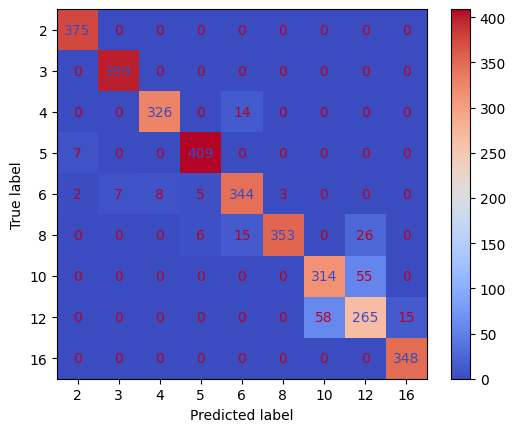

In [56]:
def report_model_test(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    basem_preds = model.predict(X_test_scaled)
    print(classification_report(y_test, basem_preds))

    # Create the confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='coolwarm')
report_model_test(model, X_train_scaled, y_train, X_test_scaled, y_test)   

### Classification
#### First Target:  Using Cylinder as the first target / Label - since it's also categorical in nature
Balance the dataset <br>
Balancing your dataset is an important consideration while building a machine learning model. This is because machine learning learning models learn more with the availability of many examples. <br>
There are several methods, however, here we are using Synthetic Minority Over-sampling Technique. Note: balancing is done based on the target variable. <br>
Plot of the target class(CYLINDERS) to see the distribution of values<br>
As can be seen from the plot the cylinders 4, 6, and 8 have more values than the rest of them. This shows that the dataset is not balanced.

#### in the classification metrix originated <br>
for support i.e.the amount for samples used for testing; <br> 
375 is used for the 2nd cylinder: and from the graph, none was mis-classified <br> 
399 is used for the 3rd cylinder : none was mis-classified<br> 
340 is used for the 4th cylinder: 12, 24, 50 and 3 were mis-classified while 251 is the predicted/actual label <br> 
in the 5th cylnder,109 and 132 are mis-classified <br>
in the 8th cylnder292 is the actual value while 25, 59 and 24 are mis-classified <br>

### Second Model

##### KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier 

In [58]:
model = KNeighborsClassifier() # instance of the model object

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       340
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       369
           8       1.00      1.00      1.00       400
          10       1.00      1.00      1.00       369
          12       1.00      1.00      1.00       338
          16       1.00      1.00      1.00       348

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354



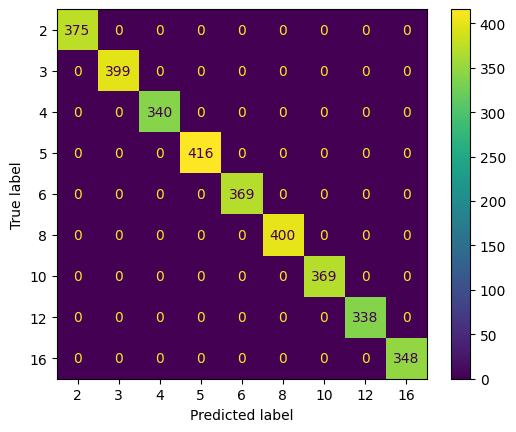

<Figure size 8000x8000 with 0 Axes>

In [59]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

##### Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier 

In [61]:
model = RandomForestClassifier()

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       399
           4       1.00      1.00      1.00       340
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       369
           8       1.00      1.00      1.00       400
          10       1.00      1.00      1.00       369
          12       1.00      1.00      1.00       338
          16       1.00      1.00      1.00       348

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354



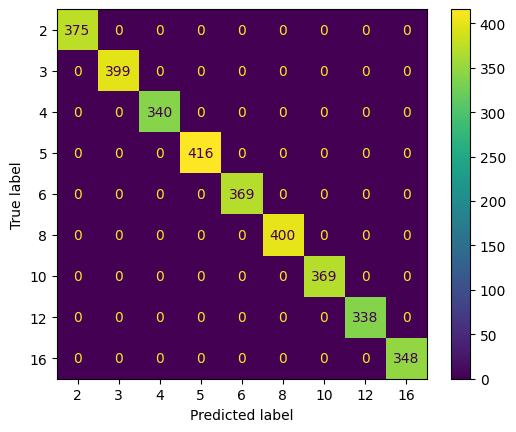

<Figure size 8000x8000 with 0 Axes>

In [62]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

#### Cross validation - process of using all samples to train and all samples to test
- Import the algorithm class from the sklearn i.e., from sklearn.linear_model import LogisticRegression
- Instantiate the model i.e., model = LogisticRegression()
- Import cross validation from sklearn i.e., from sklearn.model_selection import cross_val_score
- Apply cross validation i.e., cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)

In [63]:
# Appending several models for cross validation 
models = []  
models.append(("LR",LogisticRegression())) 
models.append(("KNN",KNeighborsClassifier())) 
models.append(("RF",RandomForestClassifier()))
 
models 

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier())]

In [64]:
def report_cross_val_score(models): 
    for name,model in models: 
        kfold = KFold(n_splits=5) 
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
        print(name, cv_result) 
        print("Mean is:", name, cv_result.mean()) 
        print("Standard Deviation is:", name, cv_result.std())
             
report_cross_val_score(models) 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LR [0.82851817 0.83970177 0.83317801 0.83737185 0.83178006]
Mean is: LR 0.8341099720410066
Standard Deviation is: LR 0.0039868126069352375
KNN [1. 1. 1. 1. 1.]
Mean is: KNN 1.0
Standard Deviation is: KNN 0.0
RF [1. 1. 1. 1. 1.]
Mean is: RF 1.0
Standard Deviation is: RF 0.0


KNN, Dtree and random forest performed well while decision tree has the best performance of 0.994

## Fuel Type as Target

In [65]:
le_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5358
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Engine_Size(L)               5359 non-null   float64
 1   Cylinders                    5359 non-null   int32  
 2   Fuel_Consump_City(L/100 km)  5359 non-null   float64
 3   Fuel_Consump_HWY(L/100 km)   5359 non-null   float64
 4   Fuel_Consump_Comb(L/100 km)  5359 non-null   float64
 5   Fuel_Consump_Comb(mpg)       5359 non-null   int32  
 6   CO2_Emmissions(g/km)         5359 non-null   int32  
 7   percent                      5359 non-null   float64
 8   Fuel_Type                    5359 non-null   int32  
dtypes: float64(5), int32(4)
memory usage: 334.9 KB


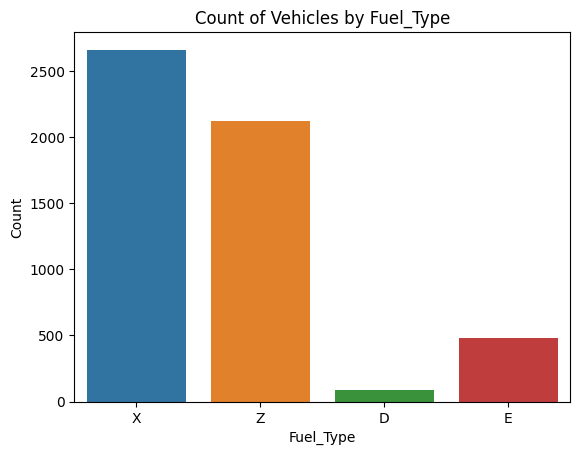

In [66]:
# Create the count plot
sns.countplot(data=df, x='Fuel_Type')
# Add labels and title
plt.title('Count of Vehicles by Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.show()
#Note The fuel type has been encoded as D=0, E=1, Z=2, X=3

In [67]:
#Specifying Input Variable and Target Variable
X = le_df.drop('Fuel_Type', axis = 1) 
y = le_df['Fuel_Type']

In [68]:
#Applying smote
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created  
X_res, y_res = sm.fit_resample(X, y) # The object is applied 
X, y = X_res, y_res # reassigning the balanced dataset to X,y

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [70]:
#Scaling the dataset
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

#### Logistic regression

In [71]:
model = LogisticRegression() 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       534
           1       1.00      1.00      1.00       526
           2       0.63      0.60      0.62       520
           3       0.66      0.65      0.65       551

    accuracy                           0.81      2131
   macro avg       0.81      0.81      0.81      2131
weighted avg       0.81      0.81      0.81      2131



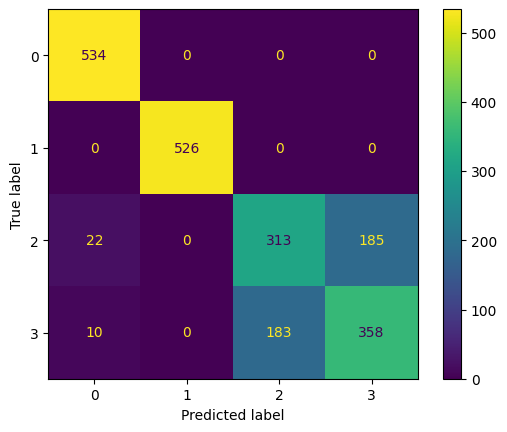

<Figure size 8000x8000 with 0 Axes>

In [72]:
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model)

in the first fuel type, 534 is the predicted label <br>
in the second fuel type, 523 is predicted; one is mis-calculated <br>
in the third fuel type, 314 is predicted; 23 and 0 are mis-calculated <br>
in the fourth fuel type, 352 is used; 11 and 188 are mis-calculated <br>

#### KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier 

In [74]:
model = KNeighborsClassifier() # instance of the model object

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       534
           1       1.00      1.00      1.00       526
           2       0.88      0.85      0.86       520
           3       0.86      0.89      0.88       551

    accuracy                           0.93      2131
   macro avg       0.94      0.93      0.93      2131
weighted avg       0.93      0.93      0.93      2131



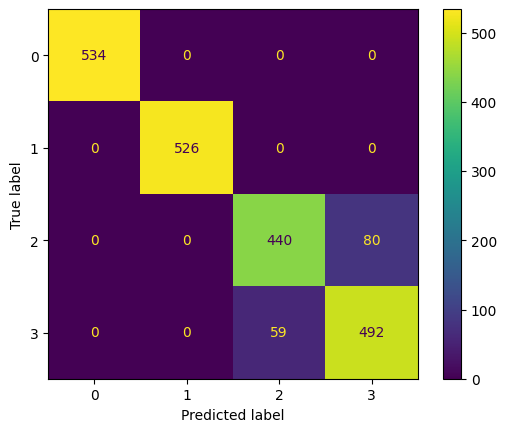

<Figure size 8000x8000 with 0 Axes>

In [75]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 


#### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       534
           1       1.00      1.00      1.00       526
           2       0.92      0.91      0.91       520
           3       0.92      0.92      0.92       551

    accuracy                           0.96      2131
   macro avg       0.96      0.96      0.96      2131
weighted avg       0.96      0.96      0.96      2131



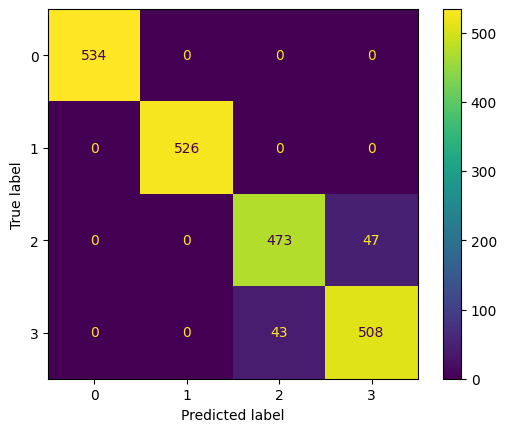

<Figure size 8000x8000 with 0 Axes>

In [77]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

## cross validation of the model

In [78]:
# Appending several models for cross validation 
models = []  
models.append(("LR",LogisticRegression())) 
models.append(("KNN",KNeighborsClassifier())) 
models.append(("RF",RandomForestClassifier()))
 
models 

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier())]

In [79]:
def report_cross_val_score(models): 
    for name,model in models: 
        kfold = KFold(n_splits=5) 
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
        print(name, cv_result) 
        print("Mean is:", name, cv_result.mean()) 
        print("Standard Deviation is:", name, cv_result.std())
             
report_cross_val_score(models) 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LR [0.83064516 0.83198826 0.83785767 0.83639032 0.85473221]
Mean is: LR 0.8383227226469128
Standard Deviation is: LR 0.008628928625752099
KNN [0.90542522 0.88554659 0.90315481 0.90608951 0.91269259]
Mean is: KNN 0.9025817424475508
Standard Deviation is: KNN 0.009090037367426286
RF [0.94721408 0.95377843 0.96258254 0.94937638 0.95744681]
Mean is: RF 0.9540796457701765
Standard Deviation is: RF 0.005531446388909992


# Third Target: Transmission

In [80]:
# Specifying Input and Target Variable
X = Encoded_df.drop(['Fuel_Type','Make','Vehicle_Class','Model','Transmission','Emission_Range'], axis=1) 
y = Encoded_df['Transmission']

In [81]:
# Applying smote
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, k_neighbors = 1) # The object is created  
X_res, y_res = sm.fit_resample(X, y) # The object is applied 
X, y = X_res, y_res # reassigning the balanced dataset to X,y

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [83]:
# scaling the dataset
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

In [84]:
# logistic regression
model = LogisticRegression() 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.43      0.38      0.40       202
           1       0.31      0.22      0.26       218
           2       0.31      0.20      0.25       207
           3       0.23      0.36      0.28       214
           4       0.36      0.05      0.09       243
           5       0.33      0.66      0.44       190
           6       0.98      1.00      0.99       204
           7       0.36      0.35      0.36       221
           8       0.17      0.12      0.14       210
           9       0.39      0.68      0.49       198
          10       0.13      0.14      0.14       195
          11       0.00      0.00      0.00       226
          12       0.29      0.20      0.23       240
          13       0.16      0.14      0.15       214
          14       0.62      1.00      0.76       223
          15       0.63      0.33      0.44       207
          16       0.56      0.18      0.27       212
          17       0.49    

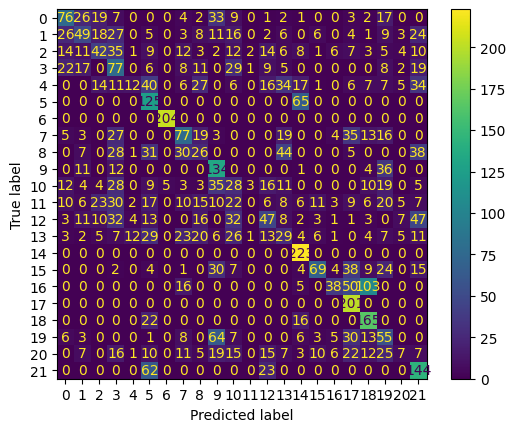

<Figure size 8000x8000 with 0 Axes>

In [85]:
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
report_model_test(model)

In [86]:
# KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier 

In [87]:
model = KNeighborsClassifier() # instance of the model object

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       202
           1       0.70      0.82      0.76       218
           2       0.56      0.50      0.53       207
           3       0.83      0.92      0.87       214
           4       0.82      0.91      0.86       243
           5       0.96      1.00      0.98       190
           6       1.00      1.00      1.00       204
           7       0.94      1.00      0.97       221
           8       0.85      0.97      0.90       210
           9       0.91      0.98      0.95       198
          10       0.76      0.93      0.84       195
          11       0.45      0.18      0.25       226
          12       0.80      0.70      0.74       240
          13       0.85      0.93      0.89       214
          14       1.00      1.00      1.00       223
          15       0.84      0.82      0.83       207
          16       0.95      0.99      0.97       212
          17       0.98    

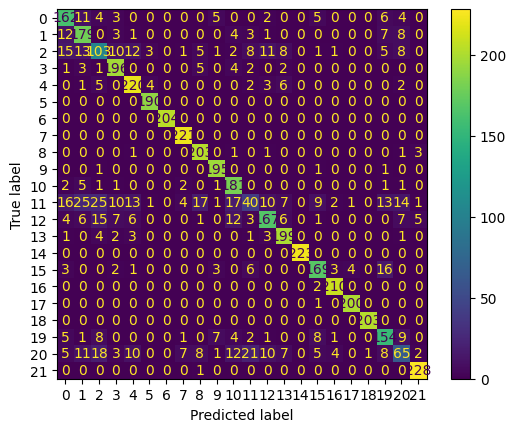

<Figure size 8000x8000 with 0 Axes>

In [88]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [89]:
# Random forest

In [90]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       202
           1       0.93      0.96      0.94       218
           2       0.77      0.76      0.77       207
           3       0.97      0.96      0.96       214
           4       0.93      0.95      0.94       243
           5       0.98      1.00      0.99       190
           6       1.00      1.00      1.00       204
           7       0.97      1.00      0.98       221
           8       0.96      0.98      0.97       210
           9       0.98      0.98      0.98       198
          10       0.95      0.95      0.95       195
          11       0.71      0.62      0.66       226
          12       0.90      0.94      0.92       240
          13       0.95      0.97      0.96       214
          14       1.00      1.00      1.00       223
          15       0.96      0.95      0.95       207
          16       0.99      1.00      1.00       212
          17       1.00    

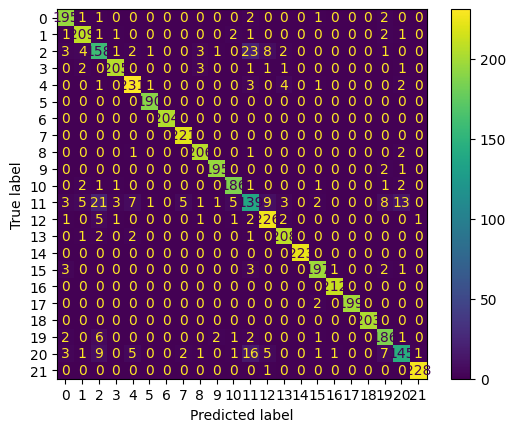

<Figure size 8000x8000 with 0 Axes>

In [91]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [92]:
# cross validation of the model

In [93]:
# Appending several models for cross validation 
models = []  
models.append(("LR",LogisticRegression())) 
models.append(("KNN",KNeighborsClassifier())) 
models.append(("RF",RandomForestClassifier()))
 
models 

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier())]

In [94]:
def report_cross_val_score(models): 
    for name,model in models: 
        kfold = KFold(n_splits=5) 
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
        print(name, cv_result) 
        print("Mean is:", name, cv_result.mean()) 
        print("Standard Deviation is:", name, cv_result.std())
             
report_cross_val_score(models) 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LR [0.25       0.25310507 0.25344075 0.28331655 0.26149715]
Mean is: LR 0.2602719033232629
Standard Deviation is: LR 0.012133400743180542
KNN [0.82583893 0.83316549 0.8271232  0.82343068 0.83551527]
Mean is: KNN 0.8290147137343957
Standard Deviation is: KNN 0.0045679562271714585
RF [0.92483221 0.93286338 0.92917086 0.92682108 0.92749245]
Mean is: RF 0.9282359964944771
Standard Deviation is: RF 0.002699155674542508


### Vehicle class

In [95]:
# Specifying Input and Target Variable
X = Encoded_df.drop(['Fuel_Type','Make','Vehicle_Class','Model','Transmission','Emission_Range'], axis=1) 
y = Encoded_df['Vehicle_Class']

In [96]:
# Applying smote
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created  
X_res, y_res = sm.fit_resample(X, y) # The object is applied 
X, y = X_res, y_res # reassigning the balanced dataset to X,y

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [98]:
# scaling the dataset
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

In [99]:
# logistic regression
model = LogisticRegression() 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.17      0.14      0.16       152
           1       0.29      0.38      0.33       149
           2       0.17      0.18      0.17       142
           3       0.11      0.02      0.03       173
           4       0.32      0.27      0.29       150
           5       0.50      0.77      0.61       133
           6       0.38      0.19      0.25       173
           7       0.38      0.67      0.48       146
           8       0.06      0.06      0.06       163
           9       0.29      0.44      0.35       149
          10       0.28      0.15      0.20       155
          11       0.21      0.12      0.15       162
          12       0.29      0.48      0.36       153
          13       0.35      0.56      0.43       139
          14       0.34      0.07      0.11       160
          15       0.56      0.71      0.63       143
          16       0.63      0.70      0.67       142

    accuracy              

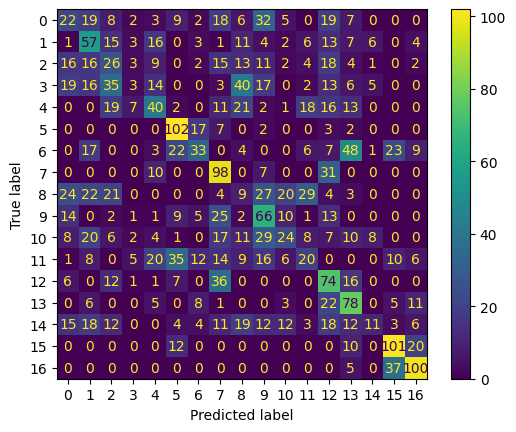

<Figure size 8000x8000 with 0 Axes>

In [100]:
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model)

In [101]:
# KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier 

In [102]:
model = KNeighborsClassifier() # instance of the model object

              precision    recall  f1-score   support

           0       0.31      0.28      0.29       152
           1       0.54      0.71      0.61       149
           2       0.55      0.28      0.37       142
           3       0.66      0.82      0.73       173
           4       0.85      0.89      0.87       150
           5       0.88      0.96      0.92       133
           6       0.71      0.65      0.68       173
           7       0.95      0.99      0.97       146
           8       0.85      0.98      0.91       163
           9       0.54      0.72      0.62       149
          10       0.41      0.34      0.37       155
          11       0.61      0.33      0.43       162
          12       0.70      0.78      0.74       153
          13       0.76      0.81      0.78       139
          14       0.64      0.48      0.55       160
          15       0.73      0.83      0.78       143
          16       0.80      0.83      0.81       142

    accuracy              

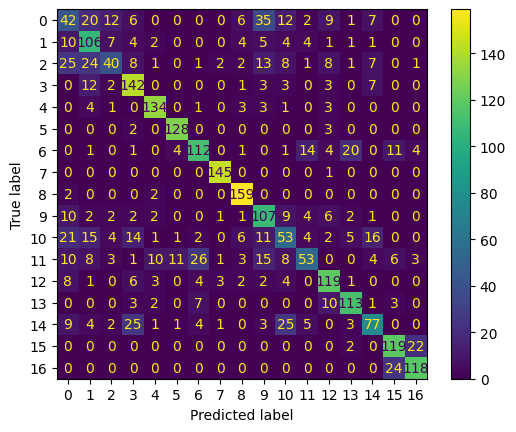

<Figure size 8000x8000 with 0 Axes>

In [103]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [104]:
# Random forest

              precision    recall  f1-score   support

           0       0.31      0.28      0.29       152
           1       0.54      0.71      0.61       149
           2       0.55      0.28      0.37       142
           3       0.66      0.82      0.73       173
           4       0.85      0.89      0.87       150
           5       0.88      0.96      0.92       133
           6       0.71      0.65      0.68       173
           7       0.95      0.99      0.97       146
           8       0.85      0.98      0.91       163
           9       0.54      0.72      0.62       149
          10       0.41      0.34      0.37       155
          11       0.61      0.33      0.43       162
          12       0.70      0.78      0.74       153
          13       0.76      0.81      0.78       139
          14       0.64      0.48      0.55       160
          15       0.73      0.83      0.78       143
          16       0.80      0.83      0.81       142

    accuracy              

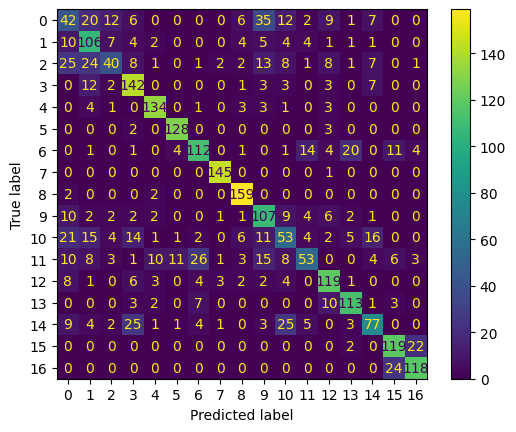

<Figure size 8000x8000 with 0 Axes>

In [105]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [106]:
# cross validation of the model

In [107]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate, KFold, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 

In [108]:
# Appending several models for cross validation 
models = []  
models.append(("LR",LogisticRegression())) 
models.append(("KNN",KNeighborsClassifier())) 
models.append(("RF",RandomForestClassifier()))
 
models 

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier())]

In [109]:
def report_cross_val_score(models): 
    for name,model in models: 
        kfold = KFold(n_splits=5) 
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
        print(name, cv_result) 
        print("Mean is:", name, cv_result.mean()) 
        print("Standard Deviation is:", name, cv_result.std())
             
report_cross_val_score(models) 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LR [0.2382104  0.23639661 0.23337364 0.27102238 0.24440411]
Mean is: LR 0.24468143004803838
Standard Deviation is: LR 0.013655045029608149
KNN [0.6662636  0.63180169 0.68923821 0.64670296 0.66061706]
Mean is: KNN 0.6589247061697943
Standard Deviation is: KNN 0.019290727497753332
RF [0.82345828 0.81499395 0.81257557 0.81064731 0.80399274]
Mean is: RF 0.8131335719526478
Standard Deviation is: RF 0.006326268236828486


### Make

In [110]:
# Specifying Input and Target Variable
X = Encoded_df.drop(['Fuel_Type','Make','Vehicle_Class','Model','Transmission','Emission_Range'], axis=1) 
y = Encoded_df['Make']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [112]:
# scaling the dataset
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

In [113]:
# logistic regression
model = LogisticRegression() 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precis

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        12
           3       0.10      0.08      0.09        36
           4       0.00      0.00      0.00         6
           5       0.36      0.72      0.48        75
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        17
           9       0.10      0.31      0.15       106
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        34
          13       0.00      0.00      0.00         5
          14       0.09      0.04      0.06        90
          15       0.31      0.49      0.38        69
          16       0.33      0.05      0.08        22
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00        27
          19       0.00    

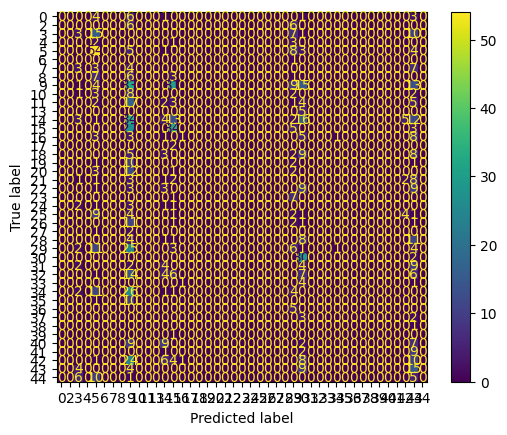

<Figure size 8000x8000 with 0 Axes>

In [114]:
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
report_model_test(model)

In [115]:
# KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier 

In [116]:
model = KNeighborsClassifier() # instance of the model object

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           2       0.30      0.25      0.27        12
           3       0.20      0.31      0.24        36
           4       0.00      0.00      0.00         6
           5       0.46      0.69      0.55        75
           6       0.00      0.00      0.00         1
           7       0.05      0.12      0.07        17
           8       0.11      0.18      0.14        17
           9       0.32      0.42      0.37       106
          10       0.05      0.06      0.06        16
          11       0.12      0.12      0.12        34
          13       1.00      0.80      0.89         5
          14       0.25      0.20      0.22        90
          15       0.22      0.20      0.21        69
          16       0.08      0.09      0.09        22
          17       0.00      0.00      0.00         2
          18       0.08      0.04      0.05        27
          19       0.17    

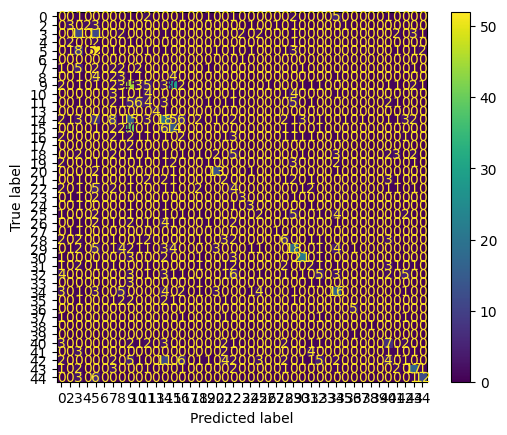

<Figure size 8000x8000 with 0 Axes>

In [117]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [118]:
# Random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.42      0.33      0.37        15
           2       0.92      0.92      0.92        12
           3       0.62      0.78      0.69        36
           4       1.00      0.67      0.80         6
           5       0.83      0.76      0.79        75
           6       1.00      1.00      1.00         1
           7       0.56      0.53      0.55        17
           8       0.32      0.35      0.33        17
           9       0.42      0.44      0.43       106
          10       0.27      0.38      0.32        16
          11       0.38      0.38      0.38        34
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         5
          14       0.71      0.57      0.63        90
          15       0.18      0.17      0.18        69
          16       0.53      0.36      0.43        22
          17       1.00      1.00      1.00         2
          18       0.50    

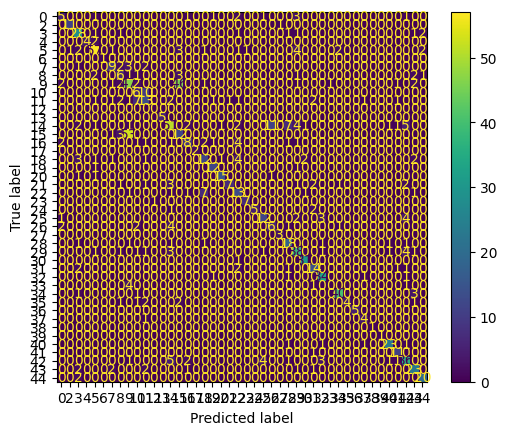

<Figure size 8000x8000 with 0 Axes>

In [120]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [121]:
# cross validation of the model

In [122]:
# Appending several models for cross validation 
models = []  
models.append(("LR",LogisticRegression())) 
models.append(("KNN",KNeighborsClassifier())) 
models.append(("RF",RandomForestClassifier()))
 
models 

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('RF', RandomForestClassifier())]

In [123]:
def report_cross_val_score(models): 
    for name,model in models: 
        kfold = KFold(n_splits=5) 
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
        print(name, cv_result) 
        print("Mean is:", name, cv_result.mean()) 
        print("Standard Deviation is:", name, cv_result.std())
             
report_cross_val_score(models) 

C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\707830\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LR [0.12827988 0.08600583 0.09329446 0.10787172 0.11240876]
Mean is: LR 0.10557213083356387
Standard Deviation is: LR 0.01484082815304133
KNN [0.28134111 0.26239067 0.25364431 0.2638484  0.27153285]
Mean is: KNN 0.2665514673022493
Standard Deviation is: KNN 0.009324816505500032
RF [0.6122449  0.59329446 0.59475219 0.58309038 0.58978102]
Mean is: RF 0.5946325892192121
Standard Deviation is: RF 0.00968254752418343
